All Regression models 
Pseudo fit
All Ensemble Regression 
Pseudo fit
Own fit (From rp)

# All Regression Models

## 1. Linear Regression 

## 2. Logistic Regression 

## 3. Decision Trees

## 4. Random Forest 

## 5. Gradient Boosting

## 6. Unsupervised : recommendation

## more models from 50 - 83

# Pseudo Fit 
- problem : 
1. For Ground owner :(date(not required)-pk,year(not required),day, month, week number , groundName, timeslot chosen , sport chosen ) --> cost spent

more things to predict with this data
- predicting # people : 
- (weekNumber-pk ,day ,  ) --> #people visiting
- (weekNumber-pk ,month ,  ) --> #people visiting
- (weekNumber-pk ,day, timeslot ,  ) --> #people visiting
- (weekNumber-pk ,day, sportChosen ,  ) --> #people visiting
- (weekNumber-pk ,month, timeslot ,  ) --> #people visiting
- (weekNumber-pk ,month, sportChosen ,  ) --> #people visiting
- ( year, ) --> # people visiting


- yearwise analytics on : 
- #poeple visiting on day vs days 
- #people visiting in month vs months
- #people choosing that timeslot vs timeslots 
- #people choosing that sport vs sports


- predicting revenue
- (weekNumber-pk ,day ,  ) --> revenue generated
- (weekNumber-pk ,month ,  ) --> revenue generated
- (weekNumber-pk ,day, timeslot ,  ) --> revenue generated
- (weekNumber-pk ,day, sportChosen ,  ) --> revenue generated
- (weekNumber-pk ,month, timeslot ,  ) --> revenue generated
- (weekNumber-pk ,month, sportChosen ,  ) --> revenue generated
- ( year, ) --> # revenue generated


- yearwise analytics on : 
- revenue of day vs days
- revenue of month vs months
- revenue of timeslot vs timeslots 
- revenue of sport vs sports


2. For  Customer : (groundName, sport , timeslot , cost spent ) --> cost spent 
- predicting cost spent

- analytics on:
-  number of users visiting ground vs grounds 
- number of users selecting a sport vs sports
- number of users selecting a timeslot vs timeslots 


In [1]:
!pip install pandas-profiling --quiet

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [52]:
!pip install plotly matplotlib seaborn --quiet

In [53]:
import pandas as pd
import random
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [54]:
# graph settings : 
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [64]:
def randomNumber(x):
    return random.randint(0,x)
def randomColor():
    r = lambda: random.randint(0,255)
    return ('#%02X%02X%02X' % (r(),r(),r()))

In [21]:
g1_prices = {'sport1':150,'sport2':150,'sport3':150,'sport4':150,'sport6':200}
s ='sport1'
g1_prices[s]

150

In [57]:
# for ground owners
#(date-pk,year(not required),day, month, week number , groundName, timeslot chosen , sport chosen ) --> cost spent

years = ['2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']

days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

groundNames = ['Ground1','Ground2','Ground3','Ground4']

timeslots = ['timeslot1','timeslot2','timeslot3','timeslot4','timeslot5','timeslot6','timeslot7']

months = ['January','February','March','April','May','June','July','August','September','October','November','December']

sports = ['sport1','sport2','sport3','sport4','sport5','sport6']

#for ground 1 : 
g1_prices = {'sport1':100,'sport2':150,'sport3':250,'sport4':350,'sport5':400,'sport6':200}
g2_prices = {'sport1':200,'sport2':150,'sport3':450,'sport4':250,'sport5':200,'sport6':100}
g3_prices = {'sport1':350,'sport2':450,'sport3':150,'sport4':200,'sport5':300,'sport6':250}
g4_prices = {'sport1':450,'sport2':250,'sport3':150,'sport4':100,'sport5':250,'sport6':500}


data = [] 
for i in range(1,3000):    
    tYear = years[randomNumber(len(years)-1)]
    tDay = days[randomNumber(len(days)-1)]
    tGroundName = groundNames[randomNumber(len(groundNames)-1)]
    tTimeSlot = timeslots[randomNumber(len(timeslots)-1)]
    tMonth = months[randomNumber(len(months)-1)]
    tSport = sports[randomNumber(len(sports)-1)]
    if(tGroundName == 'Ground1'):
        tCost = g1_prices[tSport]
    elif(tGroundName == 'Ground2'):
        tCost = g2_prices[tSport]
    elif(tGroundName == 'Ground3'):
        tCost = g3_prices[tSport]
    elif(tGroundName == 'Ground4'):
        tCost = g4_prices[tSport]
    
    data.append([tYear,tDay,tMonth,tGroundName,tTimeSlot,tSport,tCost])


groundOwners_df = pd.DataFrame(data, columns = ['Year', 'Day','Month','GroundName','TimeSlot','Sport','Cost'])
groundOwners_df

,Year,Day,Month,GroundName,TimeSlot,Sport,Cost
0,2016,Thursday,September,Ground4,timeslot1,sport3,150
1,2012,Tuesday,September,Ground4,timeslot7,sport6,500
2,2011,Friday,February,Ground1,timeslot4,sport2,150
3,2011,Friday,June,Ground2,timeslot5,sport1,200
4,2016,Thursday,July,Ground1,timeslot1,sport5,400
...,...,...,...,...,...,...,...
2994,2013,Friday,June,Ground2,timeslot6,sport2,150
2995,2019,Sunday,August,Ground3,timeslot4,sport1,350
2996,2017,Monday,August,Ground2,timeslot4,sport5,200
2997,2014,Friday,March,Ground2,timeslot6,sport6,100


In [148]:
groundOwner1_df = groundOwners_df.loc[groundOwners_df['GroundName'] == 'Ground1']
groundOwner2_df = groundOwners_df.loc[groundOwners_df['GroundName'] == 'Ground2']
groundOwner3_df = groundOwners_df.loc[groundOwners_df['GroundName'] == 'Ground3']
groundOwner4_df = groundOwners_df.loc[groundOwners_df['GroundName'] == 'Ground4']

# groundOwner1_df
# groundOwner2_df
# groundOwner3_df
# groundOwner4_df

In [84]:
groundOwner1_df["Year"].value_counts()

2012    79
2021    76
2011    74
2017    72
2016    71
2018    69
2014    69
2015    67
2019    67
2013    63
2020    54
Name: Year, dtype: int64

Day with Cost :
-0.011842075532387019
Month with Cost :
-0.03788702319305754
TimeSlot with Cost :
0.029953357835182257
Sport with Cost :
0.6351953362137412


In [115]:
#for cost regression for all grounds: 
def HistCreateCostCategorical(gDF,x,cat):
    col_dis_seq = []
    for i in range(0,x):
        col_dis_seq.append(randomColor())
    fig = px.histogram(gDF, 
                       x='Cost', 
                       marginal='box', 
                       color=cat, 
                       color_discrete_sequence=col_dis_seq, 
                       title='Revenue of Ground based on '+cat)
    
    fig.update_layout(bargap=0.1)
    fig.show()

def HistCreateCategorical(gDF,cat):
    fig = px.histogram(gDF,x=cat,title="Number of people by "+cat)
    fig.show()

def HistCreateTwoCategorical(gDF,cat,secondCat):
    fig = px.histogram(gDF,x=cat,color=secondCat,title="Number of people by "+cat+" and"+secondCat)
    fig.show()
    

    
def CostWithOtherVars(gDF):
    fig = px.scatter(gDF,
                    x=other_var)

    
def FindCorrWithCost(gDF):
    day_values ={'Monday':0,'Tuesday':1,'Wednesday':2,'Thursday':3,'Friday':4,'Saturday':5,'Sunday':6}

    timeslot_values = {'timeslot1':0,'timeslot2':1,'timeslot3':2,'timeslot4':3,'timeslot5':4,'timeslot6':5,'timeslot7':6}

    month_values = {'January':0,'February':1,'March':2,'April':3,'May':4,'June':5,'July':6,'August':7,'September':8,'October':9,'November':10,'December':11}

    sport_values = {'sport1':0,'sport2':1,'sport3':2,'sport4':3,'sport5':4,'sport6':5}


    day_numeric =groundOwner1_df["Day"].map(day_values)
    print("Day with Cost :")
    print(groundOwner1_df["Cost"].corr(day_numeric))


    month_numeric =groundOwner1_df["Month"].map(month_values)
    print("Month with Cost :")
    print(groundOwner1_df["Cost"].corr(month_numeric))

    timeslot_numeric =groundOwner1_df["TimeSlot"].map(timeslot_values)
    print("TimeSlot with Cost :")
    print(groundOwner1_df["Cost"].corr(timeslot_numeric))

    sport_numeric =groundOwner1_df["Sport"].map(sport_values)
    print("Sport with Cost :")
    print(groundOwner1_df["Cost"].corr(sport_numeric))
    


    
def AnalyticsPipeline(gDF):
    print(gDF)
    print("\nInformation about the Data for Ground")
    gDF.info()
    print("\nStatistics about the Revenue Data for Ground")
    print(gDF.describe())
    fig = px.histogram(gDF, 
                   x='Cost', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Cost')
    fig.update_layout(bargap=0.1)
    fig.show()
    print("\nDistribution of Cost with Categorical Variables")
    HistCreateCostCategorical(gDF,11,'Year')
    HistCreateCostCategorical(gDF,11,'Month')
    HistCreateCostCategorical(gDF,11,'Day')
    HistCreateCostCategorical(gDF,11,'TimeSlot')
    HistCreateCostCategorical(gDF,11,'Sport')
    
    print("\nDistribution of Categorical Variables")
    HistCreateCategorical(gDF,'Year')
    HistCreateCategorical(gDF,'Month')
    HistCreateCategorical(gDF,'Day')
    HistCreateCategorical(gDF,'TimeSlot')
    HistCreateCategorical(gDF,'Sport')
    
    print("\nDistribution of Two Categorical Variables")
    HistCreateTwoCategorical(gDF,'Year','Month')
    HistCreateTwoCategorical(gDF,'Month','Day')
    HistCreateTwoCategorical(gDF,'Day','TimeSlot')
    HistCreateTwoCategorical(gDF,'Day','Sport')
    HistCreateTwoCategorical(gDF,'Sport','TimeSlot')
    
    
    print("\nRelationship of Day with Cost")
    temp_fig =px.violin(gDF,x="Day",y="Cost",color="Month")
    temp_fig.show()

    print("\nRelationship of Month with Cost")
    temp_fig =px.violin(gDF,x="Month",y="Cost",color="Year")
    temp_fig.show()
    
    print("\nRelationship of Sport with Cost")
    temp_fig =px.violin(gDF,x="Sport",y="Cost",color="Day")
    temp_fig.show()
    
    print("\nRelationship of TimeSlot with Cost")
    temp_fig =px.violin(gDF,x="TimeSlot",y="Cost",color="Day")
    temp_fig.show()
    
    
    print("\nFinding Correlation of Day,Month,TimeSlot,Sport with Cost")
    FindCorrWithCost(gDF)
    



In [116]:
AnalyticsPipeline(groundOwner1_df)

      Year       Day      Month GroundName   TimeSlot   Sport  Cost
2     2011    Friday   February    Ground1  timeslot4  sport2   150
4     2016  Thursday       July    Ground1  timeslot1  sport5   400
6     2011   Tuesday  September    Ground1  timeslot5  sport4   350
8     2017  Thursday   February    Ground1  timeslot4  sport6   200
9     2011  Thursday  September    Ground1  timeslot4  sport4   350
...    ...       ...        ...        ...        ...     ...   ...
2953  2014  Saturday   December    Ground1  timeslot5  sport6   200
2957  2017  Saturday     August    Ground1  timeslot1  sport1   100
2972  2015    Friday   December    Ground1  timeslot4  sport1   100
2976  2014  Saturday       July    Ground1  timeslot1  sport3   250
2986  2012    Friday   November    Ground1  timeslot4  sport5   400

[761 rows x 7 columns]

Information about the Data for Ground
<class 'pandas.core.frame.DataFrame'>
Int64Index: 761 entries, 2 to 2986
Data columns (total 7 columns):
 #   Column     


Distribution of Cost with Categorical Variables



Distribution of Categorical Variables



Distribution of Two Categorical Variables



Relationship of Day with Cost



Relationship of Month with Cost



Relationship of Sport with Cost



Relationship of TimeSlot with Cost



Finding Correlation of Day,Month,TimeSlot,Sport with Cost
Day with Cost :
-0.011842075532387019
Month with Cost :
-0.03788702319305754
TimeSlot with Cost :
0.029953357835182257
Sport with Cost :
0.6351953362137412


In [ ]:
RegressionPipeline(groundOwner2_df)

In [ ]:
RegressionPipeline(groundOwner3_df)

In [ ]:
RegressionPipeline(groundOwner4_df)

<AxesSubplot:xlabel='Day', ylabel='Cost'>

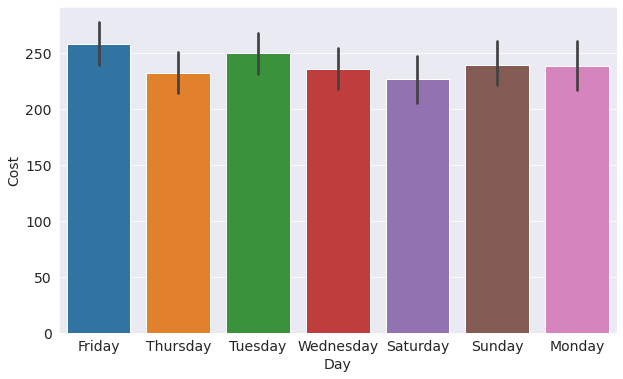

In [131]:
sns.barplot(data =groundOwner1_df, x="Day", y="Cost" )

<AxesSubplot:xlabel='Month', ylabel='Cost'>

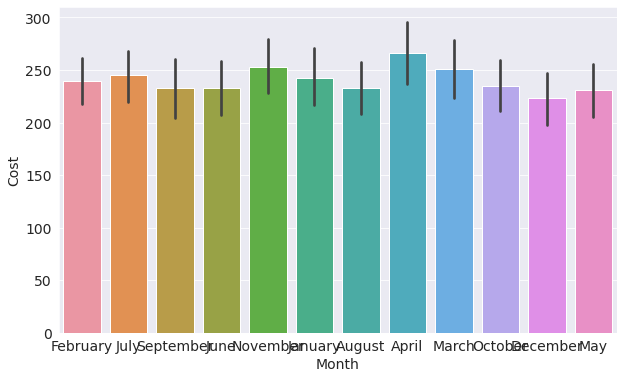

In [132]:
sns.barplot(data =groundOwner1_df, x="Month", y="Cost" )

<AxesSubplot:xlabel='TimeSlot', ylabel='Cost'>

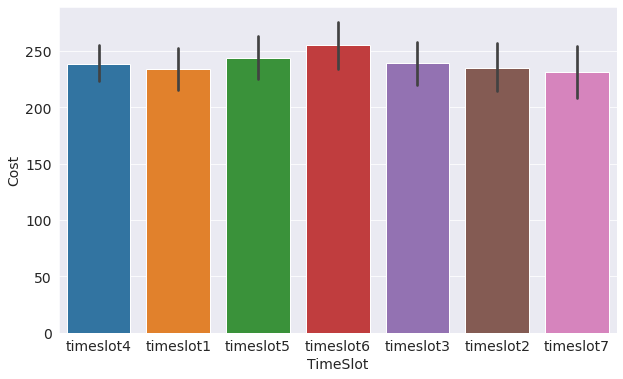

In [133]:
sns.barplot(data =groundOwner1_df, x="TimeSlot", y="Cost" )

<AxesSubplot:xlabel='Sport', ylabel='Cost'>

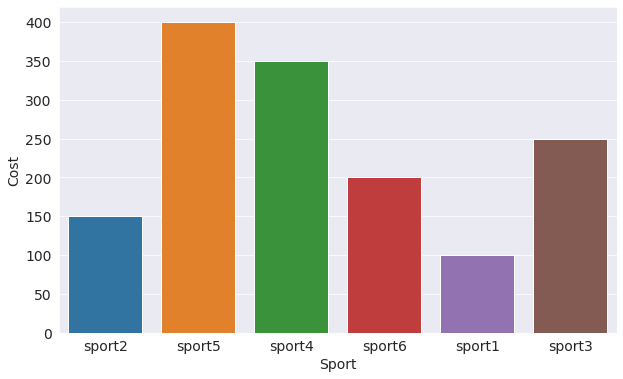

In [134]:
sns.barplot(data =groundOwner1_df, x="Sport", y="Cost" )

/tmp/ipykernel_89838/411454152.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_89838/411454152.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_89838/411454152.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_898

,Year,Day,Month,GroundName,TimeSlot,Sport,Cost,day_code,timeslot_codes,month_codes,sport_codes
2,2011,Friday,February,Ground1,timeslot4,sport2,150,4,3,1,1
4,2016,Thursday,July,Ground1,timeslot1,sport5,400,3,0,6,4
6,2011,Tuesday,September,Ground1,timeslot5,sport4,350,1,4,8,3
8,2017,Thursday,February,Ground1,timeslot4,sport6,200,3,3,1,5
9,2011,Thursday,September,Ground1,timeslot4,sport4,350,3,3,8,3
...,...,...,...,...,...,...,...,...,...,...,...
2953,2014,Saturday,December,Ground1,timeslot5,sport6,200,5,4,11,5
2957,2017,Saturday,August,Ground1,timeslot1,sport1,100,5,0,7,0
2972,2015,Friday,December,Ground1,timeslot4,sport1,100,4,3,11,0
2976,2014,Saturday,July,Ground1,timeslot1,sport3,250,5,0,6,2


/tmp/ipykernel_89838/222528358.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_89838/222528358.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_89838/222528358.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_89

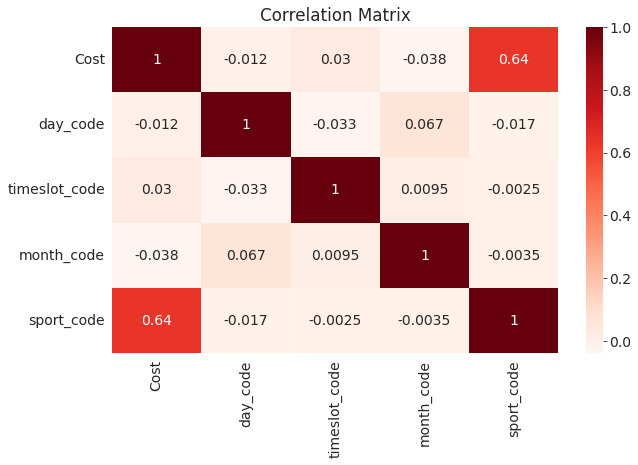

In [151]:
#handling categorical variables
day_codes ={'Monday':0,'Tuesday':1,'Wednesday':2,'Thursday':3,'Friday':4,'Saturday':5,'Sunday':6}

timeslot_codes = {'timeslot1':0,'timeslot2':1,'timeslot3':2,'timeslot4':3,'timeslot5':4,'timeslot6':5,'timeslot7':6}

month_codes = {'January':0,'February':1,'March':2,'April':3,'May':4,'June':5,'July':6,'August':7,'September':8,'October':9,'November':10,'December':11}

sport_codes = {'sport1':0,'sport2':1,'sport3':2,'sport4':3,'sport5':4,'sport6':5}
groundOwner1_df['day_code'] = groundOwner1_df["Day"].map(day_codes)
groundOwner1_df['timeslot_code']= groundOwner1_df["TimeSlot"].map(timeslot_codes)
groundOwner1_df['month_code']= groundOwner1_df["Month"].map(month_codes)
groundOwner1_df['sport_code']= groundOwner1_df["Sport"].map(sport_codes)

groundOwner1_df
# groundOwner1_df.corr()    
sns.heatmap(groundOwner1_df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

/tmp/ipykernel_89838/3161380992.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_89838/3161380992.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_89838/3161380992.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_8

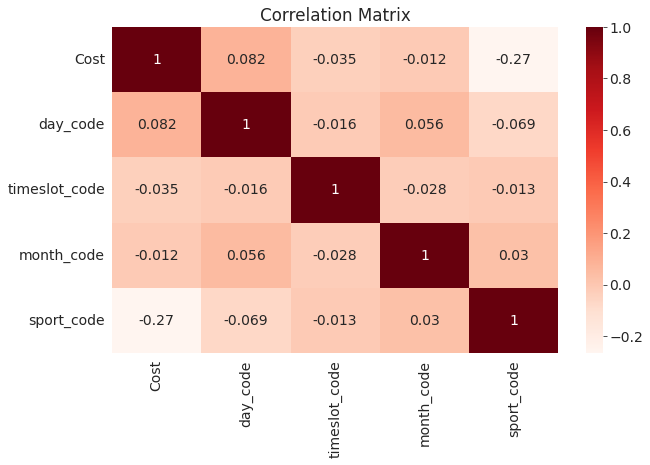

In [152]:
groundOwner2_df['day_code'] = groundOwner2_df["Day"].map(day_codes)
groundOwner2_df['timeslot_code']= groundOwner2_df["TimeSlot"].map(timeslot_codes)
groundOwner2_df['month_code']= groundOwner2_df["Month"].map(month_codes)
groundOwner2_df['sport_code']= groundOwner2_df["Sport"].map(sport_codes)

groundOwner2_df
# groundOwner1_df.corr()    
sns.heatmap(groundOwner2_df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

/tmp/ipykernel_89838/527173775.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_89838/527173775.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_89838/527173775.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_8983

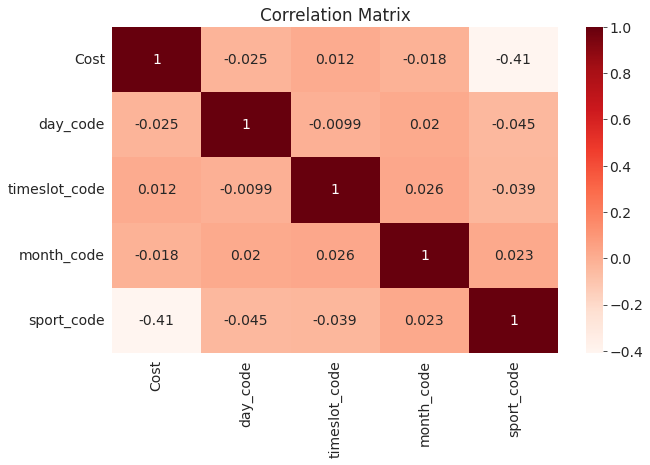

In [153]:
groundOwner3_df['day_code'] = groundOwner3_df["Day"].map(day_codes)
groundOwner3_df['timeslot_code']= groundOwner3_df["TimeSlot"].map(timeslot_codes)
groundOwner3_df['month_code']= groundOwner3_df["Month"].map(month_codes)
groundOwner3_df['sport_code']= groundOwner3_df["Sport"].map(sport_codes)

groundOwner3_df
# groundOwner1_df.corr()    
sns.heatmap(groundOwner3_df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

/tmp/ipykernel_89838/2325676682.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_89838/2325676682.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_89838/2325676682.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_8

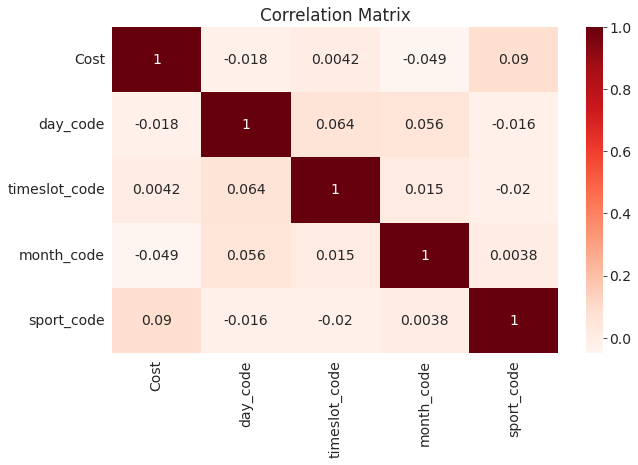

In [154]:
groundOwner4_df['day_code'] = groundOwner4_df["Day"].map(day_codes)
groundOwner4_df['timeslot_code']= groundOwner4_df["TimeSlot"].map(timeslot_codes)
groundOwner4_df['month_code']= groundOwner4_df["Month"].map(month_codes)
groundOwner4_df['sport_code']= groundOwner4_df["Sport"].map(sport_codes)

groundOwner4_df
# groundOwner1_df.corr()    
sns.heatmap(groundOwner4_df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

In [155]:
!pip3 install scikit-learn --quiet

In [156]:
from sklearn.linear_model import LinearRegression

In [159]:
model = LinearRegression()
inputs = groundOwner1_df[['Day']]
targets = groundOwner1_df['Cost']
print('inputs.shape :', inputs.shape)
print('targets.shape :', targets.shape)
model.fit(inputs,targets)
model.predict(np.array([0],[1],[2]))

inputs.shape : (761, 1)
targets.shape : (761,)


ValueError: could not convert string to float: 'Friday'

In [ ]:
def RegressionPipeline(gDF):
    # cost = weight x day + bias
    pass

In [144]:
RegressionPipeline(groundOwner1_df)

NameError: name 'head' is not defined

In [105]:
# for number of people regression(analytics included) for all grounds

In [106]:
# for cost spent regression(analytics included) for customers 

# All Ensemble Techniques
- methods understand from 84 - 102 
- implement by searching method name 

## Voting Ensemble

## Stacking


## Bagging - Random Forest 

## Boosting - ADA Boost, Gradient Boosting , XG Boosting 



# Pseudo Fit 

# Own Fit (from rp)